In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\ksushma\Practise\bank-additional.csv',sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

no     36548
yes     4640
Name: y, dtype: int64


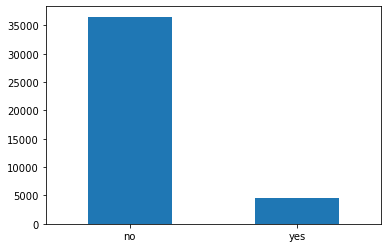

In [6]:
print(df['y'].value_counts() )
df['y'].value_counts().plot(kind = 'bar', rot=0)

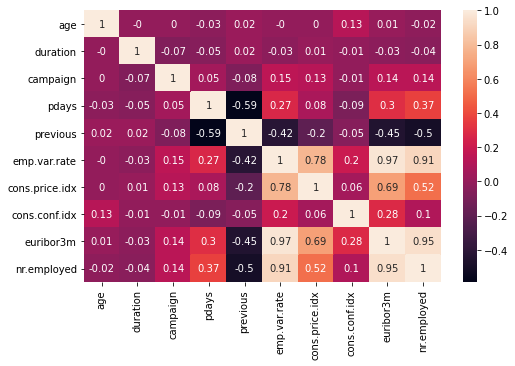

In [7]:
corr=df.corr().round(2)
plt.figure(figsize=(8,5))
sns.heatmap(data=corr,annot=True)

In [8]:
df.columns  

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df['y']=le.fit_transform(df['y']) 
df['job']=le.fit_transform(df['job']) 
df['marital']=le.fit_transform(df['marital']) 
df['education']=le.fit_transform(df['education']) 
df['default']=le.fit_transform(df['default']) 
df['housing']=le.fit_transform(df['housing']) 
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['day_of_week']=le.fit_transform(df['day_of_week'])
df['poutcome']=le.fit_transform(df['poutcome'])



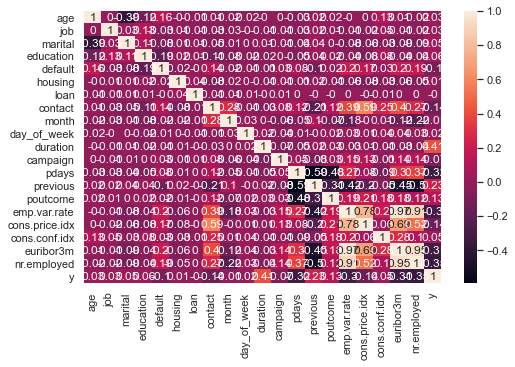

In [12]:
sns.set(rc={'figure.figsize':(8,5)})
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
print(df['y'].value_counts() )
X=df.drop('y',axis=1)
y=df['y']
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X_res, y_res =  rus.fit_resample(X, y)

0    36548
1     4640
Name: y, dtype: int64


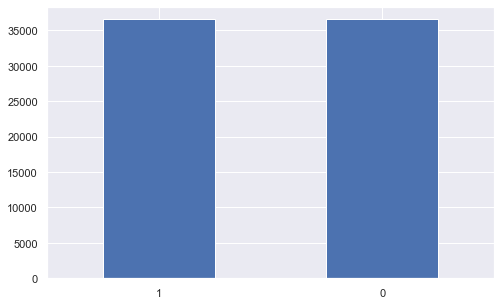

In [15]:
y_res.value_counts().plot(kind = 'bar', rot=0)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, 
                                                    y_res, test_size=0.3, 
                                                    random_state=101)

In [18]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
10291,34,2,1,6,0,2,2,1,4,1,265,3,999,0,1,1.4,94.465,-41.8,4.960,5228.1
19686,56,9,1,5,0,2,0,0,1,2,124,3,999,0,1,1.4,93.444,-36.1,4.968,5228.1
62256,37,9,2,5,0,2,0,0,7,4,224,1,999,0,1,-1.1,94.767,-50.8,1.044,4963.6
30295,63,5,1,3,0,0,0,0,0,2,198,1,999,1,0,-1.8,93.075,-47.1,1.365,5099.1
27260,50,9,1,6,0,2,0,0,7,0,100,2,999,0,1,-0.1,93.200,-42.0,4.021,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,33,9,1,5,0,0,0,0,1,3,129,2,999,0,1,1.4,93.444,-36.1,4.966,5228.1
55293,51,2,1,4,0,2,0,0,0,2,838,3,999,0,1,-1.8,93.075,-47.1,1.410,5099.1
49751,31,0,2,6,0,0,0,0,1,2,81,1,3,1,2,-2.9,92.201,-31.4,0.829,5076.2
5695,50,2,1,2,0,2,0,1,6,1,215,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [21]:
print(accuracy_score(y_test, pred_svc))

0.8905102831866478


In [23]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(
                              learning_rate=1.0,
                              n_estimators=100,
algorithm='SAMME.R')

adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8732728350585982

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01,0.5], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.763, total= 4.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.756, total= 4.2min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.9min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total= 4.8min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.751, total= 6.2min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.760, total= 5.9min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.878, total= 2.8min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.882, total= 2.7min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.885, total= 3.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.875, total= 2.5min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

In [ ]:
svc2 = SVC(C = 100, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(accuracy_score(y_test, pred_svc2))

In [ ]:
new_observation = [[9,1,5,0,2,0,0,1,2,124,3,999,0,1,1.4
]]

In [ ]:
p = svc.predict(new_observation)
p